### Importing Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import random
import statsmodels.api as sm
import pandas_datareader as pdr
from datetime import date
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

-----

### Importing Data

My variable will be the Adj Close

Adjusted close is the closing price after adjustments for all applicable splits and dividend distributions

Becasue my market index is S&P500 i will use North America Factors for my regression analiysis 

In [2]:
tickers = ["FBC", "CHRW", "CDNS", "CZR", "CPB", "COF", "CAH", "KMX", "CCL", "CARR"]
start=date(2020,12,1)
end=date.today()

#Stocks
Assets = pdr.get_data_yahoo(tickers, start, end, interval='d')
Assets  = Assets["Adj Close"].dropna()

#Factors for the regression
Factors = pdr.get_data_famafrench('North_America_3_Factors_Daily',start,end)[0].dropna()
Factors.index = Factors.index.astype('datetime64[ns]')
Factors = Factors/100

------

### Inspecting and visualizing data 

It is always useful to have a first look at the data by inspecting and visualizing it

In [3]:
Assets.head(10)

Symbols,FBC,CHRW,CDNS,CZR,CPB,COF,CAH,KMX,CCL,CARR
Date,,,,,,,,,,
2020-12-01,35.964256,91.778786,115.650002,67.839996,48.664795,88.172874,52.165653,96.139999,20.150000,37.199543
2020-12-02,36.461685,90.282227,116.430000,68.500000,47.522022,89.834099,53.729755,96.470001,21.160000,36.437748
2020-12-03,36.700451,90.507195,116.680000,71.129997,47.202435,89.725975,53.517345,96.269997,22.879999,36.299229
2020-12-04,36.541279,90.898453,118.339996,73.839996,46.970005,90.669632,55.023514,96.500000,23.450001,37.298481
2020-12-07,36.272659,91.182106,119.019997,74.860001,46.785999,91.387207,53.488380,96.059998,23.200001,36.447639
2020-12-08,36.332355,92.218933,118.410004,75.269997,46.737572,91.062828,54.521465,94.379997,23.570000,36.902737
2020-12-09,36.411942,93.001457,115.489998,71.779999,45.788490,93.304008,54.212502,94.870003,22.690001,37.436985
2020-12-10,36.591015,90.693039,117.449997,71.129997,45.817547,93.058258,53.536659,94.339996,22.320000,37.140182
2020-12-11,36.610916,91.637245,118.519997,69.900002,45.720699,90.600830,52.407028,93.930000,21.320000,36.764229


In [4]:
Assets.tail(10)

Symbols,FBC,CHRW,CDNS,CZR,CPB,COF,CAH,KMX,CCL,CARR
Date,,,,,,,,,,
2021-11-24,49.290001,98.260002,183.470001,93.940002,41.349998,155.860001,48.779999,147.360001,20.160000,55.689999
2021-11-26,47.970001,96.279999,178.360001,91.199997,41.520000,149.160004,47.599998,145.750000,17.950001,55.380001
2021-11-29,47.029999,95.620003,186.690002,93.480003,41.200001,147.020004,47.470001,146.479996,18.160000,55.980000
2021-11-30,46.540001,95.089996,177.460007,90.070000,40.330002,140.529999,46.230000,141.250000,17.620001,54.119999
2021-12-01,45.520000,93.870003,175.050003,83.070000,39.910000,138.369995,45.869999,140.309998,16.379999,53.599998
2021-12-02,47.430000,94.220001,184.660004,90.029999,40.520000,143.360001,46.810001,144.089996,17.889999,55.520000
2021-12-03,46.830002,97.000000,177.869995,86.589996,41.130001,141.899994,47.020000,142.679993,17.200001,56.119999
2021-12-06,47.830002,97.900002,177.210007,92.040001,41.299999,145.940002,47.700001,144.500000,18.590000,55.849998
2021-12-07,47.869999,98.290001,182.770004,90.379997,41.119999,148.580002,48.099998,149.910004,18.500000,56.639999


In [5]:
Assets.describe().round(2)

Symbols,FBC,CHRW,CDNS,CZR,CPB,COF,CAH,KMX,CCL,CARR
count,258.00,258.00,258.00,258.00,258.00,258.00,258.00,258.00,258.00,258.00
mean,45.97,93.14,144.39,94.51,44.83,141.13,53.62,126.46,24.12,46.53
std,3.99,3.63,17.95,12.67,2.76,24.56,3.68,14.26,3.19,7.16
min,35.96,84.15,115.49,66.87,39.91,88.17,45.87,91.00,16.38,35.25
25%,43.66,90.25,130.88,85.26,42.21,123.55,50.80,119.39,21.65,39.77
50%,45.66,93.44,139.26,94.42,44.95,152.54,53.17,128.97,23.56,45.83
75%,48.58,96.13,155.21,104.23,47.01,159.44,56.44,134.97,26.76,53.61
max,55.89,100.61,188.12,119.49,51.44,177.05,60.90,154.85,31.31,58.19


Graphically visiualizing the assets

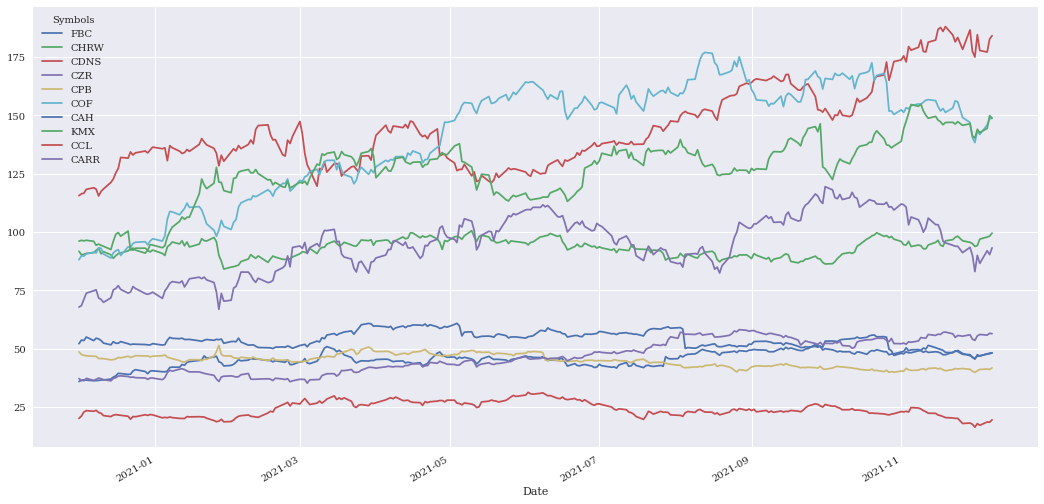

In [6]:
Assets.plot(figsize = (18,9));

In [7]:
Factors.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 196 entries, 2020-12-01 to 2021-08-31
Freq: B
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Mkt-RF  196 non-null    float64
 1   SMB     196 non-null    float64
 2   HML     196 non-null    float64
 3   RF      196 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


----

### Merging Data 

Merging data by usuing Pandas merge method to have all the required data in one table

In [8]:
All_Data = pd.merge(Assets, Factors, on = "Date")

In [9]:
All_Data

,FBC,CHRW,CDNS,CZR,CPB,COF,CAH,KMX,CCL,CARR,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,,
2020-12-01,35.964256,91.778786,115.650002,67.839996,48.664795,88.172874,52.165653,96.139999,20.150000,37.199543,0.0101,-0.0020,0.0053,0.0
2020-12-02,36.461685,90.282227,116.430000,68.500000,47.522022,89.834099,53.729755,96.470001,21.160000,36.437748,0.0018,-0.0026,0.0130,0.0
2020-12-03,36.700451,90.507195,116.680000,71.129997,47.202435,89.725975,53.517345,96.269997,22.879999,36.299229,0.0017,0.0070,0.0015,0.0
2020-12-04,36.541279,90.898453,118.339996,73.839996,46.970005,90.669632,55.023514,96.500000,23.450001,37.298481,0.0104,0.0114,0.0100,0.0
2020-12-07,36.272659,91.182106,119.019997,74.860001,46.785999,91.387207,53.488380,96.059998,23.200001,36.447639,-0.0002,0.0015,-0.0106,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-25,48.979542,89.793419,158.630005,97.699997,40.752605,173.265915,51.277287,127.480003,24.110001,57.609661,0.0028,0.0005,0.0033,0.0
2021-08-26,48.381020,89.475250,159.369995,99.989998,40.078518,170.974716,50.811760,126.260002,23.469999,57.250473,-0.0068,-0.0028,-0.0028,0.0
2021-08-27,49.199005,90.220955,162.470001,104.239998,41.040085,175.128799,51.247574,126.589996,24.350000,58.188351,0.0110,0.0154,0.0019,0.0


-----

### Calculating Returns Of Stocks 

In order to run CAPM and Fama French regerssions, i need the returns of the stocks. For that i will use cantinous returns and will calculate it with log method from NumPy library

In [10]:
Asset_Returns = np.log(Assets/Assets.shift(1)).dropna()

I merge them with the factors again

In [11]:
Final_Data = pd.merge(Asset_Returns, Factors, on = "Date")

In [12]:
Final_Data.head(10)

,FBC,CHRW,CDNS,CZR,CPB,COF,CAH,KMX,CCL,CARR,Mkt-RF,SMB,HML,RF
Date,,,,,,,,,,,,,,
2020-12-02,0.013736,-0.016441,0.006722,0.009682,-0.023763,0.018665,0.029543,0.003427,0.048908,-0.020691,0.0018,-0.0026,0.0130,0.0
2020-12-03,0.006527,0.002489,0.002145,0.037675,-0.006748,-0.001204,-0.003961,-0.002075,0.078151,-0.003809,0.0017,0.0070,0.0015,0.0
2020-12-04,-0.004346,0.004314,0.014127,0.037391,-0.004936,0.010462,0.027755,0.002386,0.024607,0.027156,0.0104,0.0114,0.0100,0.0
2020-12-07,-0.007378,0.003116,0.005730,0.013719,-0.003925,0.007883,-0.028296,-0.004570,-0.010718,-0.023076,-0.0002,0.0015,-0.0106,0.0
2020-12-08,0.001644,0.011307,-0.005138,0.005462,-0.001036,-0.003556,0.019130,-0.017644,0.015822,0.012409,0.0044,0.0073,-0.0056,0.0
2020-12-09,0.002188,0.008450,-0.024969,-0.047476,-0.020516,0.024313,-0.005683,0.005178,-0.038050,0.014373,-0.0094,0.0005,0.0146,0.0
2020-12-10,0.004906,-0.025135,0.016829,-0.009097,0.000634,-0.002637,-0.012545,-0.005602,-0.016441,-0.007960,0.0024,0.0116,-0.0051,0.0
2020-12-11,0.000544,0.010357,0.009069,-0.017443,-0.002116,-0.026762,-0.021326,-0.004355,-0.045838,-0.010174,-0.0020,-0.0032,-0.0072,0.0
2020-12-14,0.010811,-0.015031,0.023268,0.026958,-0.010647,-0.019169,-0.013540,-0.014909,-0.018462,-0.014638,-0.0031,0.0051,-0.0169,0.0


----

### Regression Analysis

#### CAPM regression

$$E(R_{i}) = R_{f} + \beta(R_{m} - R_{f})$$

In order to run this formula, we take Rf to the right hand side and try to perdict E(Ri) - Rf(dependent variable) with B(Rm - Rf)(independent variable)

In [13]:
Stocks = ["Flagstar Bancrop, Inc", "C. H. Robinson", "Cadence Design Systems", "Caesars Entertainment", "Campbell Soup", "Capital One Financial", "Crdinal Health", "CarMax", "Carnival Corporation", "Carrier Global"]
Independen_Var = sm.add_constant(Final_Data["Mkt-RF"])
#writer = pd.ExcelWriter('CAPM_reg_results.xlsx', engine='xlsxwriter')
for i in tickers:
    Dependent_Var = Final_Data[i] - Final_Data["RF"]
    Regression = sm.OLS(Dependent_Var, Independen_Var).fit()
    Regression_Summary = pd.DataFrame(columns=["coef","t-values", "P-values", "R-squared", "F-statistic", 
                                            "Prob (F-statistic)", "No. Observations"], index=['const', 'Mkt-RF'])
    Regression_Summary["coef"] = Regression.params
    Regression_Summary["t-values"] = Regression.tvalues
    Regression_Summary["P-values"] = Regression.pvalues
    Regression_Summary["R-squared"] = Regression.rsquared_adj
    Regression_Summary["F-statistic"] = Regression.fvalue
    Regression_Summary["Prob (F-statistic)"] = Regression.f_pvalue
    Regression_Summary["No. Observations"] = Regression.nobs
    print("")
    print('\033[1m' + Stocks[tickers.index(i)] + '\033[0m')
    print("")
    print(Regression.summary())
    #Regression_Summary.to_excel(writer, sheet_name =Stocks[tickers.index(i)])

#writer.save()


Flagstar Bancrop, Inc

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     64.34
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.14e-13
Time:                        23:51:04   Log-Likelihood:                 502.92
No. Observations:                 188   AIC:                            -1002.
Df Residuals:                     186   BIC:                            -995.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0

#### Fama French Regression 

$$E(R_{i}) = R_{f} + \beta_{1}(R_{m} - R_{f}) + \beta_{2}(SMB) + \beta_{3}(HML)$$

Also in this regression Rf is taken to the left hand side and the dependent variable is predicted with three regressors

In [14]:
Independen_Variable = sm.add_constant(Final_Data[["Mkt-RF", "SMB", "HML"]])
#writer = pd.ExcelWriter('Fama_French_reg_results.xlsx', engine='xlsxwriter')
for i in tickers:
    Dependent_Variable = Final_Data[i] - Final_Data["RF"]
    Regression = sm.OLS(Dependent_Variable, Independen_Variable).fit()
    
    Regression_Summary2 = pd.DataFrame(columns=["coef","t-values", "P-values", "R-squared", "F-statistic", 
                                            "Prob (F-statistic)", "No. Observations"], index=['const', 'Mkt-RF', "SMB", "HML"])
    Regression_Summary2["coef"] = Regression.params
    Regression_Summary2["t-values"] = Regression.tvalues
    Regression_Summary2["P-values"] = Regression.pvalues
    Regression_Summary2["R-squared"] = Regression.rsquared_adj
    Regression_Summary2["F-statistic"] = Regression.fvalue
    Regression_Summary2["Prob (F-statistic)"] = Regression.f_pvalue
    Regression_Summary2["No. Observations"] = Regression.nobs
    
    print("")
    print('\033[1m' + Stocks[tickers.index(i)] + '\033[0m')
    print("")
    print(Regression.summary())
    #Regression_Summary2.to_excel(writer, sheet_name =Stocks[tickers.index(i)])
#writer.save()


Flagstar Bancrop, Inc

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     41.96
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           1.04e-20
Time:                        23:51:04   Log-Likelihood:                 523.99
No. Observations:                 188   AIC:                            -1040.
Df Residuals:                     184   BIC:                            -1027.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0

- In both of the regressions i have commented out the parts which create and write the regression output to an excel file. To export the results, just simply remove the comments.

-----

### Visualization  

####  Price Development Of Stocks 

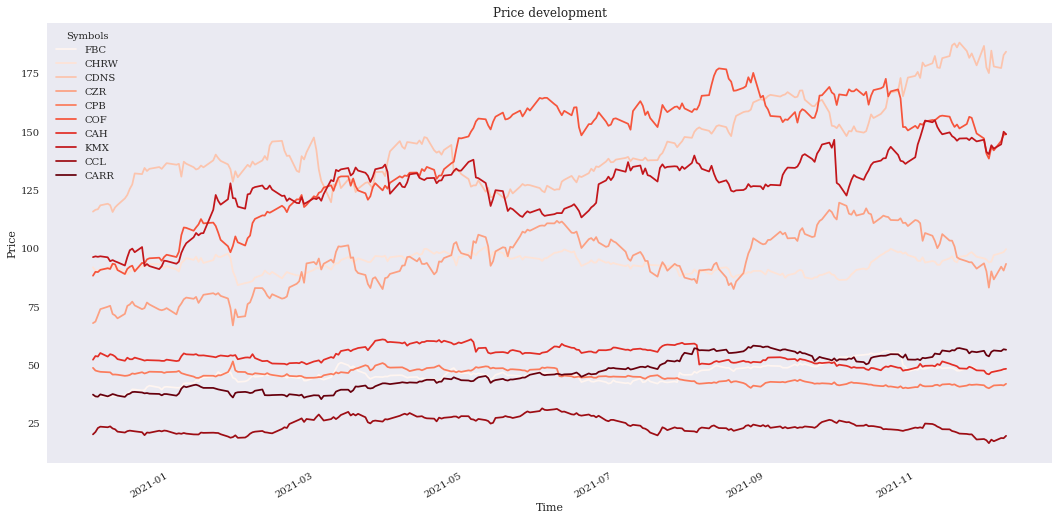

In [15]:
ax = Assets.plot(xlabel='Time', ylabel='Price',figsize=(18,9), subplots=False, grid=False, colormap = "Reds", 
             title='Price development')

#ax.figure.savefig('Price_Development_Of_Stocks.png')

#### Jointplots Of Stocks 

The jointplots below demonstrate the distribution of the variables(Excess Stock returns and Market riks permium) and the relationship between the two variabes. 

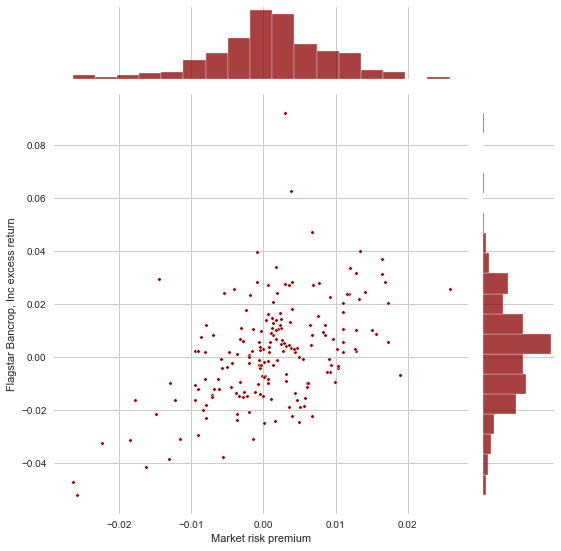

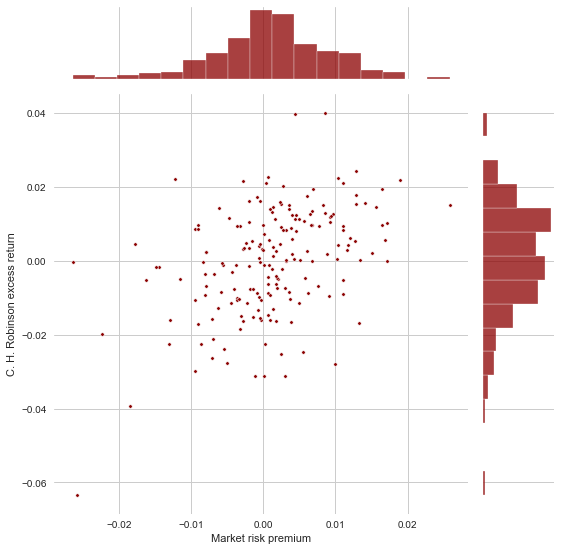

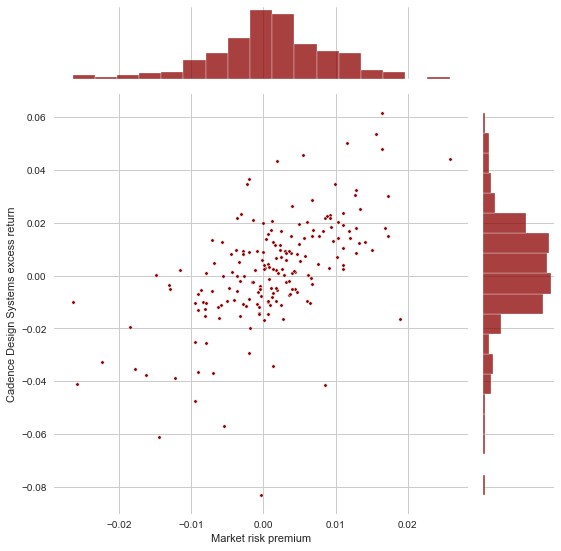

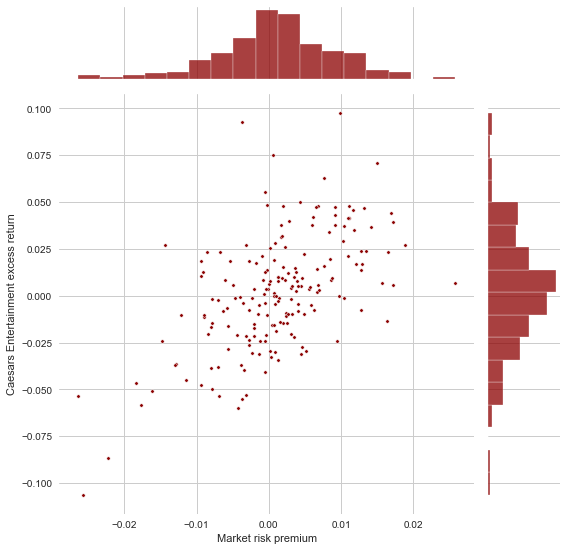

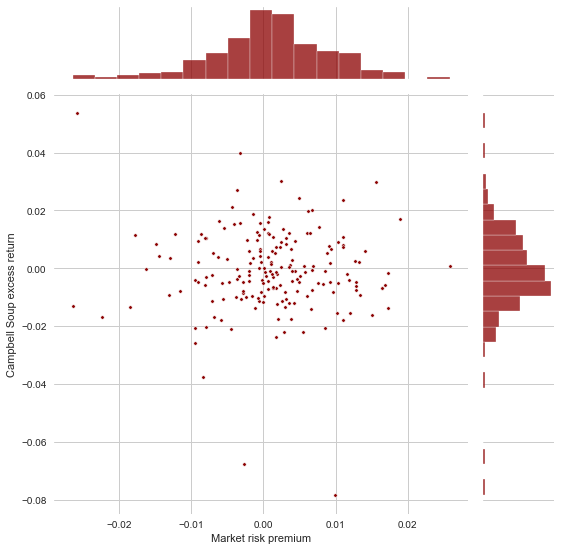

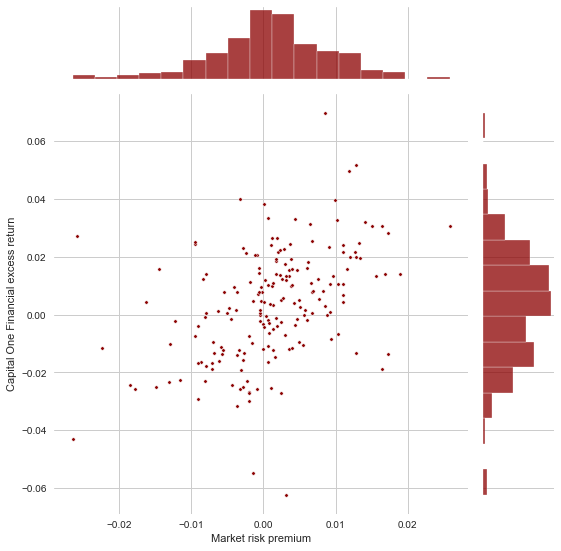

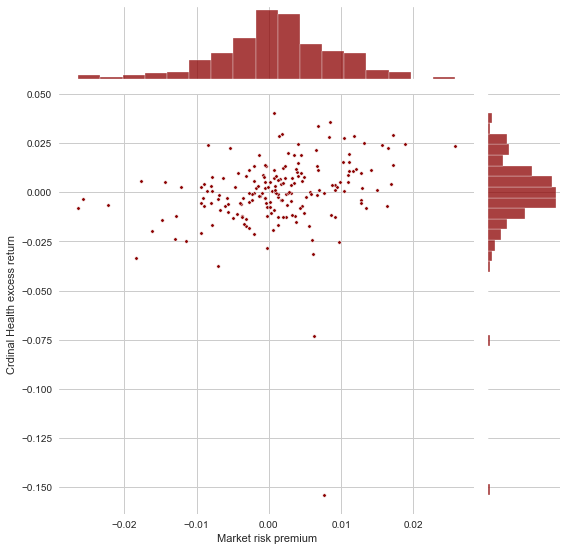

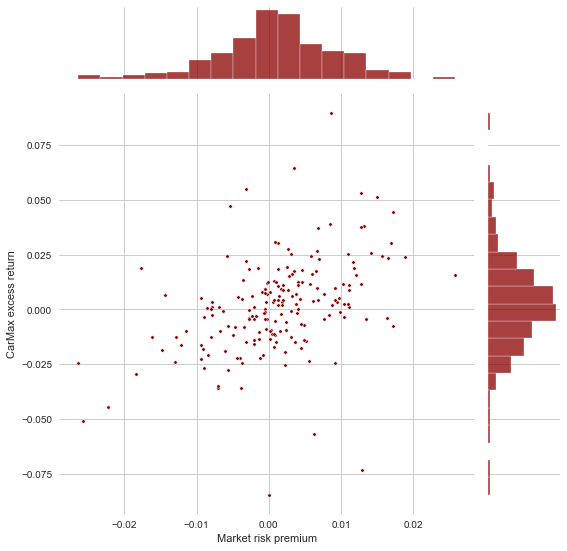

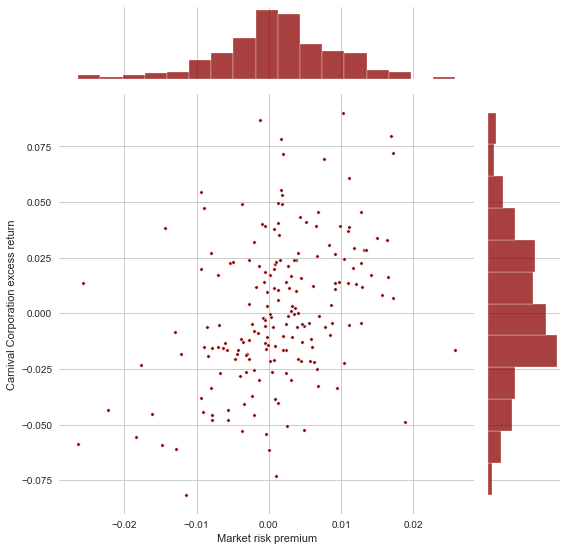

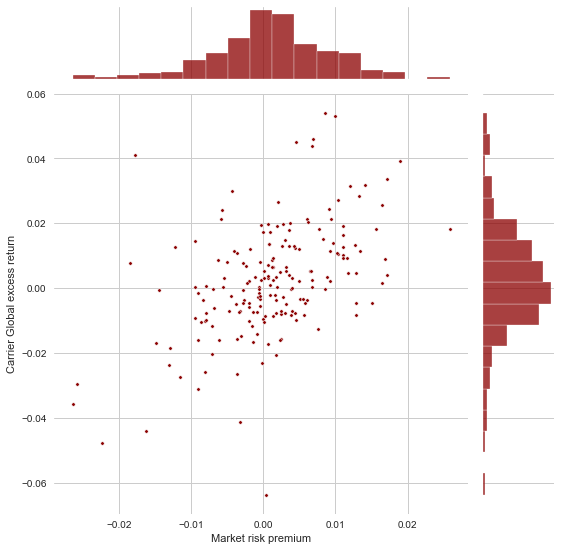

In [16]:
sns.set_style('whitegrid')
for i in tickers:
    plot=sns.jointplot(x=Final_Data['Mkt-RF'], y=Final_Data[i], marker=".", color='darkred')
    plot.fig.set_size_inches(8, 8)
    plot.set_axis_labels("Market risk premium", Stocks[tickers.index(i)] + " excess return")
    #plt.savefig("CAPM analysis for " + Stocks[tickers.index(i)] + "stock with distribution.png",  dpi=300)
    plt.show()

- Parts that save the figurs as png files have been commented out. To save the figurs simply delete the comments and run the code again